# NREL NSRDB GOES Aggregated

Documentation Regarding NSRDB: https://data.openei.org/submissions/1

The following variables are provided by the NSRDB:
- Irradiance:
    - Global Horizontal (ghi)
    - Direct Normal (dni)
    - Diffuse (dhi)
- Clear-sky Irradiance
- Cloud Type
- Dew Point
- Temperature
- Surface Albedo
- Pressure
- Relative Humidity
- Solar Zenith Angle
- Precipitable Water
- Wind Direction
- Wind Speed
- Fill Flag
- Angstrom wavelength exponent (alpha)
- Aerosol optical depth (aod)
- Aerosol asymmetry parameter (asymmetry)
- Cloud optical depth (cld_opd_dcomp)
- Cloud effective radius (cld_ref_dcomp)
- cloud_press_acha
- Reduced ozone vertical pathlength (ozone)
- Aerosol single-scatter albedo (ssa)

Dataset is present as yearly HDF volumes.

The hard part about this dataset is accessing it. It's available to public for free on AWS and Azure, but
the download speeds are too slow.

 - AWS took around 9 minutes to open the dataset (this is just the index, and actual data is not yet fetched)
 - Azure took around 5 minutes for same

Azure is clearly faster but it has less data.

Once dataset is opened there are the above mentioned variables.

Each variable has dimension `(time, location)`

 - `time` has timestamps (for NOAA Aggregated, interval is 30 minutes)

 - `location` has ('latitude', 'longitude', 'elevation', 'timezone', 'country', 'state', 'county', 'urban', 'population', 'landcover')

We can create a subset using the time and location information.




## Accessing Data Via AWS

In [7]:

import h5py
import numpy as np
import fsspec
import xarray as xr
import matplotlib.pyplot as plt


# Path to the file in a public S3 bucket
s3_path = "s3://nrel-pds-nsrdb/GOES/aggregated/v4.0.0/nsrdb_2023.h5"

In [6]:
%%time

f = fsspec.open(s3_path, mode='rb', anon=True).open()    
hdf_file = h5py.File(f, 'r')

CPU times: user 1.26 s, sys: 844 ms, total: 2.1 s
Wall time: 41.6 s


In [9]:
%%time

ds = xr.open_dataset(f, backend_kwargs={"phony_dims": "sort"}, engine="h5netcdf")

CPU times: user 9.36 s, sys: 6.43 s, total: 15.8 s
Wall time: 8min 26s


In [14]:
ds_aws = ds
ds_aws

<xarray.Dataset> Size: 7TB
Dimensions:                   (phony_dim_0: 17520, phony_dim_1: 2018267)
Dimensions without coordinates: phony_dim_0, phony_dim_1
Data variables: (12/28)
    air_temperature           (phony_dim_0, phony_dim_1) float64 283GB ...
    alpha                     (phony_dim_0, phony_dim_1) float64 283GB ...
    aod                       (phony_dim_0, phony_dim_1) float64 283GB ...
    asymmetry                 (phony_dim_0, phony_dim_1) float64 283GB ...
    cld_opd_dcomp             (phony_dim_0, phony_dim_1) float64 283GB ...
    cld_press_acha            (phony_dim_0, phony_dim_1) float64 283GB ...
    ...                        ...
    surface_albedo            (phony_dim_0, phony_dim_1) float64 283GB ...
    surface_pressure          (phony_dim_0, phony_dim_1) float64 283GB ...
    time_index                (phony_dim_0) |S25 438kB ...
    total_precipitable_water  (phony_dim_0, phony_dim_1) float64 283GB ...
    wind_direction            (phony_dim_0, phony_dim_1) float64 283GB ...
    wind_speed                (phony_dim_0, phony_dim_1) float64 283GB ...
Attributes:
    version:  4.0.1

## Accessing Data Via Azure

In [ ]:
import xarray as xr
import pandas as pd
import planetary_computer

from adlfs import AzureBlobFileSystem

# Year to investigate and plot
year = 2015

# Storage resources
storage_account_name = 'nrel'
folder = f'nrel-nsrdb/v3'

In [13]:
%%time

fs = AzureBlobFileSystem(
    account_name=storage_account_name,
    credential=planetary_computer.sas.get_token("nrel", "nrel-nsrdb").token
)
file = fs.open(f"nrel-nsrdb/v3/nsrdb_{year}.h5")
ds_azure = xr.open_dataset(file, backend_kwargs={"phony_dims": "sort"}, engine="h5netcdf")
ds_azure

CPU times: user 5.35 s, sys: 3.28 s, total: 8.63 s
Wall time: 4min 29s


<xarray.Dataset> Size: 2TB
Dimensions:                   (phony_dim_0: 17520, phony_dim_1: 2018392,
                               phony_dim_2: 2)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2
Data variables: (12/28)
    air_temperature           (phony_dim_0, phony_dim_1) int8 35GB ...
    alpha                     (phony_dim_0, phony_dim_1) int16 71GB ...
    aod                       (phony_dim_0, phony_dim_1) int16 71GB ...
    asymmetry                 (phony_dim_0, phony_dim_1) int16 71GB ...
    cld_opd_dcomp             (phony_dim_0, phony_dim_1) int16 71GB ...
    cld_reff_dcomp            (phony_dim_0, phony_dim_1) int16 71GB ...
    ...                        ...
    surface_albedo            (phony_dim_0, phony_dim_1) int16 71GB ...
    surface_pressure          (phony_dim_0, phony_dim_1) int16 71GB ...
    time_index                (phony_dim_0) |S30 526kB ...
    total_precipitable_water  (phony_dim_0, phony_dim_1) int16 71GB ...
    wind_direction            (phony_dim_0, phony_dim_1) int16 71GB ...
    wind_speed                (phony_dim_0, phony_dim_1) int16 71GB ...
Attributes:
    Version:  3.0.6

### Exploring the dataset
After opening the datasets (from either AWS or Azure) we can use any one to explore the data.

In [28]:
# Time dimension 
time_index = pd.to_datetime(ds_aws['time_index'][...].astype(str))
time_index 

DatetimeIndex(['2023-01-01 00:00:00+00:00', '2023-01-01 00:30:00+00:00',
               '2023-01-01 01:00:00+00:00', '2023-01-01 01:30:00+00:00',
               '2023-01-01 02:00:00+00:00', '2023-01-01 02:30:00+00:00',
               '2023-01-01 03:00:00+00:00', '2023-01-01 03:30:00+00:00',
               '2023-01-01 04:00:00+00:00', '2023-01-01 04:30:00+00:00',
               ...
               '2023-12-31 19:00:00+00:00', '2023-12-31 19:30:00+00:00',
               '2023-12-31 20:00:00+00:00', '2023-12-31 20:30:00+00:00',
               '2023-12-31 21:00:00+00:00', '2023-12-31 21:30:00+00:00',
               '2023-12-31 22:00:00+00:00', '2023-12-31 22:30:00+00:00',
               '2023-12-31 23:00:00+00:00', '2023-12-31 23:30:00+00:00'],
              dtype='datetime64[ns, UTC]', length=17520, freq=None)

In [ ]:
# This is 35360037840 * 8 bytes = 282.88 gigabytes of a single variable!

ds_aws["air_temperature"]

<xarray.DataArray 'air_temperature' (phony_dim_0: 17520, phony_dim_1: 2018267)> Size: 283GB
[35360037840 values with dtype=float64]
Dimensions without coordinates: phony_dim_0, phony_dim_1
Attributes:
    chunks:                  [2000  500]
    data_source:             MERRA2
    elevation_correction:    True
    physical_max:            70.0
    physical_min:            -100.0
    psm_scale_factor:        10.0
    psm_units:               Celsius
    source_dir:              /projects/pxs/ancillary/merra
    spatial_interp_method:   IDW2
    temporal_interp_method:  linear
    units:                   Celsius

In [16]:
ds_aws["meta"]

<xarray.DataArray 'meta' (phony_dim_1: 2018267)> Size: 262MB
[2018267 values with dtype=[('latitude', '<f4'), ('longitude', '<f4'), ('elevation', '<i2'), ('timezone', '<i2'), ('country', 'S36'), ('state', 'S31'), ('county', 'S51')]]
Dimensions without coordinates: phony_dim_1

In [ ]:
# Create a subset of location indexes

meta = ds_aws["meta"].data
df = pd.DataFrame(meta) 

In [ ]:
# Available Countries
df['country'].unique()

array([b'nan', b'Fiji', b'United States', b'Wallis and Futuna',
       b'United States Minor Outlying Islands', b'Tonga', b'Samoa',
       b'Kiribati', b'American Samoa', b'Niue', b'Cook Islands',
       b'French Polynesia', b'Canada', b'Mexico', b'Clipperton Island',
       b'Guatemala', b'Ecuador', b'El Salvador', b'Honduras', b'Belize',
       b'Nicaragua', b'Costa Rica', b'Cuba', b'Panama', b'Colombia',
       b'Cayman Islands', b'Peru', b'Bahamas', b'Jamaica', b'Haiti',
       b'Brazil', b'Venezuela', b'Turks and Caicos Islands',
       b'Dominican Republic', b'Chile', b'Aruba', b'Bolivia',
       b'Cura\xc3\xa7ao', b'Bonaire, Sint Eustatius and Saba',
       b'Puerto Rico', b'Virgin Islands, U.S.', b'Bermuda',
       b'British Virgin Islands', b'Anguilla', b'Saint-Martin',
       b'Sint Maarten', b'Saint Kitts and Nevis',
       b'Saint-Barth\xc3\xa9lemy', b'Paraguay', b'Montserrat',
       b'Trinidad and Tobago', b'Antigua and Barbuda', b'Guadeloupe',
       b'Grenada', b'Domini

In [25]:
# Available states in USA
USA = df[df["country"] == b"United States"]
USA['state'].unique()


array([b'Alaska', b'Hawaii', b'Washington', b'Oregon', b'California',
       b'Nevada', b'Idaho', b'Montana', b'Arizona', b'Utah', b'Wyoming',
       b'Colorado', b'New Mexico', b'Texas', b'North Dakota',
       b'South Dakota', b'Nebraska', b'Oklahoma', b'Kansas', b'Minnesota',
       b'Iowa', b'Missouri', b'Arkansas', b'Louisiana', b'Wisconsin',
       b'Mississippi', b'Illinois', b'Michigan', b'Tennessee',
       b'Kentucky', b'Alabama', b'Indiana', b'Florida', b'Georgia',
       b'Ohio', b'North Carolina', b'Virginia', b'South Carolina',
       b'West Virginia', b'Pennsylvania', b'New York', b'Maryland',
       b'District of Columbia', b'Delaware', b'New Jersey',
       b'Connecticut', b'Massachusetts', b'Vermont', b'New Hampshire',
       b'Rhode Island', b'Maine'], dtype=object)

In [26]:
# Subsetting Wasington
WS = USA[USA["state"] == b'Washington']

WS

,latitude,longitude,elevation,timezone,country,state,county
107904,48.369999,-124.699997,128,-8,b'United States',b'Washington',b'Clallam'
107909,48.169998,-124.699997,50,-8,b'United States',b'Washington',b'Clallam'
107910,48.130001,-124.699997,40,-8,b'United States',b'Washington',b'Clallam'
108227,48.369999,-124.660004,135,-8,b'United States',b'Washington',b'Clallam'
108228,48.330002,-124.660004,36,-8,b'United States',b'Washington',b'Clallam'
...,...,...,...,...,...,...,...
225803,46.049999,-116.980003,709,-8,b'United States',b'Washington',b'Asotin'
225804,46.009998,-116.980003,1065,-8,b'United States',b'Washington',b'Asotin'
226505,46.169998,-116.940002,481,-8,b'United States',b'Washington',b'Asotin'
226508,46.049999,-116.940002,520,-8,b'United States',b'Washington',b'Asotin'


### Subsetting the NSRDB data

We will query a subset of data. All points over Washington DC, US and the first 7 days
from 2023-01-01 00:00:00  to 2023-01-06 23:30:00

In [ ]:
%%time
# try opening a weeks's worth of data for air temperature
air_temp_subset_1_week = ds_aws["air_temperature"][:336, WS.index].load()

CPU times: user 8.13 s, sys: 4.94 s, total: 13.1 s
Wall time: 10min 2s


In [78]:
%%time
# try opening a weeks's worth of data for surface_pressure
surface_pressure_subset_1_week = ds_aws["surface_pressure"][:336, WS.index].load()

CPU times: user 12.2 s, sys: 7.68 s, total: 19.9 s
Wall time: 29min 31s


In [ ]:
time_array = xr.DataArray(time_index[:336], dims=["phony_dim_0"], name="time") 

In [85]:
lat_array = xr.DataArray(WS["latitude"].to_numpy(), dims=["phony_dim_1"], name="latitude") 
lon_array = xr.DataArray(WS["longitude"].to_numpy(), dims=["phony_dim_1"], name="longitude") 

In [101]:
# this is for saving the dataset in netcdf
air_temp_subset_1_week.attrs["elevation_correction"] = "True"
surface_pressure_subset_1_week.attrs["elevation_correction"] = "True"

ws_ds = ds = xr.Dataset({
  "air_temperature": air_temp_subset_1_week,
  "surface_pressure": surface_pressure_subset_1_week,
  "latitude": lat_array,
  "longitude": lon_array,
  "time": time_array
  })

ws_ds

<xarray.Dataset> Size: 70MB
Dimensions:           (phony_dim_0: 336, phony_dim_1: 12990)
Coordinates:
  * phony_dim_0       (phony_dim_0) object 3kB 1672531200000000000 ... 167313...
Dimensions without coordinates: phony_dim_1
Data variables:
    air_temperature   (phony_dim_0, phony_dim_1) float64 35MB 740.0 ... 440.0
    surface_pressure  (phony_dim_0, phony_dim_1) float64 35MB 1.008e+03 ... 9...
    latitude          (phony_dim_1) float32 52kB 48.37 48.17 ... 46.05 46.01
    longitude         (phony_dim_1) float32 52kB -124.7 -124.7 ... -116.9 -116.9
    time              (phony_dim_0) object 3kB 1672531200000000000 ... 167313...

### Storing the subset dataset to a local file

So we don't have to query this data again from the servers.

In [ ]:
ws_ds.to_netcdf("nsrdb_washington.nc")

In [97]:
subset_ds = xr.open_dataset("nsrdb_washington.nc")

<Axes: xlabel='lon', ylabel='lat'>

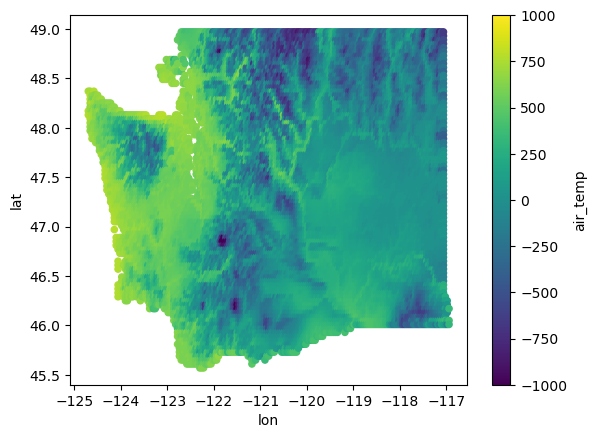

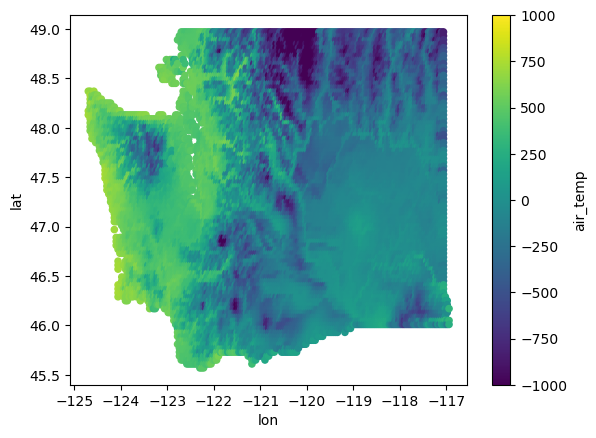

In [102]:
# Let's plot out the data!
t0 = subset_ds.isel(phony_dim_0=0)
pd.DataFrame(
  {"air_temp": t0.air_temperature.values,
  "lat": t0.latitude.values,
  "lon": t0.longitude.values
  }).plot.scatter(x="lon", y="lat", c="air_temp", cmap="viridis", vmin=-1000, vmax=1000)

t0 = subset_ds.isel(phony_dim_0=10)
pd.DataFrame(
  {"air_temp": t0.air_temperature.values,
  "lat": t0.latitude.values,
  "lon": t0.longitude.values
  }).plot.scatter(x="lon", y="lat", c="air_temp", cmap="viridis", vmin=-1000, vmax=1000)

# pd.DataFrame(
#   {"surface_pressue": t0.surface_pressure.values,
#   "lat": t0.latitude.values,
#   "lon": t0.longitude.values
#   }).plot.scatter(x="lon", y="lat", c="surface_pressue", cmap="viridis", vmin=600, vmax=1000)

# Converting the data to Zarr

Now we may actually convert this point data to zarr.

For this we need to resample this dataset using `PyResample`.

In [100]:
import pyresample as pr
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def plot_2d_array(array: np.ndarray):
  plt.imshow(array, cmap='viridis', aspect='auto')
  plt.colorbar(label="Value")
  plt.show()

In [2]:
ds_ws = xr.open_dataset("nsrdb_washington.nc")

ds_ws = ds_ws.rename_dims({"phony_dim_0": "time_index", "phony_dim_1": "location_index"})

ds_ws

<xarray.Dataset> Size: 70MB
Dimensions:           (time_index: 336, location_index: 12990)
Coordinates:
  * phony_dim_0       (time_index) int64 3kB 1672531200000000000 ... 16731342...
Dimensions without coordinates: time_index, location_index
Data variables:
    air_temperature   (time_index, location_index) float64 35MB ...
    surface_pressure  (time_index, location_index) float64 35MB ...
    latitude          (location_index) float32 52kB ...
    longitude         (location_index) float32 52kB ...
    time              (time_index) int64 3kB ...

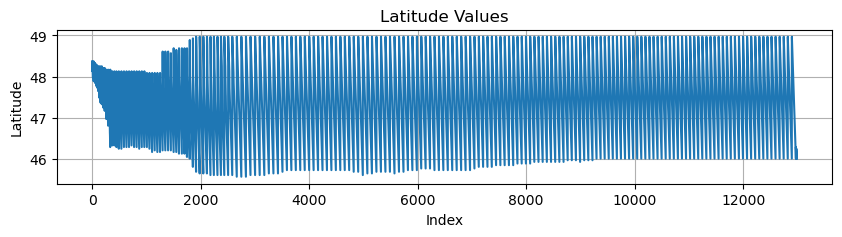

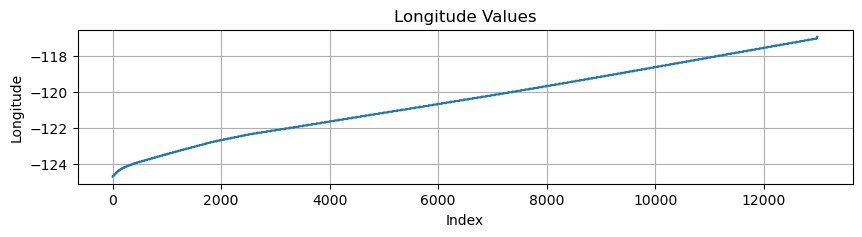

In [3]:
# Longitude vs Latitude

plt.figure(figsize=(10, 2))
plt.plot(ds_ws.latitude.values)
plt.title('Latitude Values')
plt.xlabel('Index')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 2))
plt.plot(ds_ws.longitude.values)
plt.title('Longitude Values')
plt.xlabel('Index')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

Let's resample this point data to grid it.
We will chose a bounding box [-125, 45, -116, 50] and a resolution of 0.01 degrees.

In [ ]:
ds_t0 = ds_ws.isel(time_index=0)

In [117]:
ds_t0.time

<xarray.DataArray 'time' ()> Size: 8B
[1 values with dtype=int64]
Coordinates:
    phony_dim_0  int64 8B 1672531200000000000

In [ ]:
swath_def = pr.geometry.SwathDefinition(
  lons=ds_t0.longitude.values, lats=ds_t0.latitude.values, 
)
area_def = pr.area_config.create_area_def(
  'washington', 4326, area_extent = [-125, 45, -116, 50], resolution=0.01
)

# NOTE: The data is scaled down and there is a multiplier present in the attributes of this dataset.
air_temp_data = ds_t0.air_temperature.values


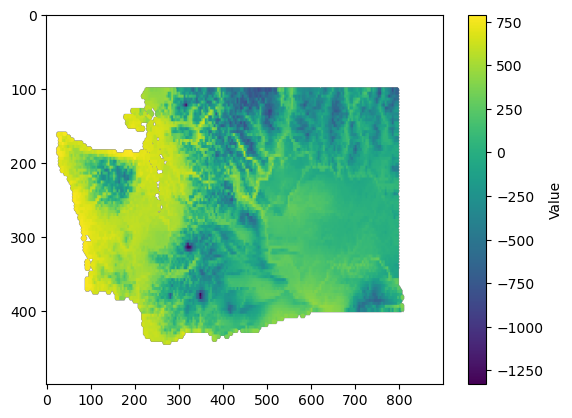

CPU times: user 209 ms, sys: 36.5 ms, total: 246 ms
Wall time: 190 ms


In [109]:
%%time

# NOTE - pyresample is quite fast but time increase as resolution increases.

result = pr.kd_tree.resample_nearest(
  swath_def, air_temp_data, area_def, radius_of_influence=5000, epsilon=0.5, fill_value=np.nan
)

plot_2d_array(result)

Now that we can create gridded data from our ungridded data, let's resample all the timesteps and create a new gridded dataset.

In [ ]:
def regrid_da(da: xr.DataArray, area_def, swath_def):
  slices = []
  for time in da.time_index.values:
    da_slice = da.sel(time_index=time)
    da_slice_data = da_slice.values
    result = pr.kd_tree.resample_nearest(
      swath_def, da_slice_data, area_def, radius_of_influence=5000, epsilon=0.5, fill_value=np.nan
    )
    slices.append(result)
  var_data = np.stack(slices, axis=0)
  lons_mesh, lats_mesh = area_def.get_lonlats()
  lons = lons_mesh[0]
  lats = lats_mesh.transpose()[0]
  return xr.DataArray(
    data=var_data,
    dims=('time_index', 'latitude', 'longitude'),
    coords=dict(
      time_index=da.phony_dim_0.values,
      latitude=lats,
      longitude=lons,)
  )

In [133]:
%%time

swath_def = pr.geometry.SwathDefinition(
  lons=ds_t0.longitude.values, lats=ds_t0.latitude.values, 
)
area_def = pr.area_config.create_area_def(
  'washington', 4326, area_extent = [-125, 45, -116, 50], resolution=0.01
)

air_temperature_da = regrid_da(ds_ws.air_temperature, area_def, swath_def)
surface_pressure_da = regrid_da(ds_ws.surface_pressure, area_def, swath_def)

CPU times: user 1min 9s, sys: 1.21 s, total: 1min 10s
Wall time: 21.5 s


Now that we have the data array, we can easily create a dataset from it and then save it as zarr.

In [136]:
ds = xr.Dataset({"air_temperature": air_temperature_da, "surface_pressue": surface_pressure_da})

ds.to_zarr("nsrdb_washington.zarr")
ds

<xarray.Dataset> Size: 2GB
Dimensions:          (time_index: 336, latitude: 500, longitude: 900)
Coordinates:
  * time_index       (time_index) int64 3kB 1672531200000000000 ... 167313420...
  * latitude         (latitude) float64 4kB 49.99 49.98 49.97 ... 45.02 45.0
  * longitude        (longitude) float64 7kB -125.0 -125.0 ... -116.0 -116.0
Data variables:
    air_temperature  (time_index, latitude, longitude) float64 1GB nan ... nan
    surface_pressue  (time_index, latitude, longitude) float64 1GB nan ... nan

Just for fun, let's create a GIF to see how air_temperature changes over the week.

In [127]:
import xarray as xr
import matplotlib.pyplot as plt
import imageio
import os

def create_da_gif(da: xr.DataArray, output_gif: str = "output.gif", fps: int = 5, max_frames = None):

    if "time_index" not in da.dims:
        raise ValueError("DataArray must have a 'time' dimension.")

    temp_dir = "temp_frames"
    os.makedirs(temp_dir, exist_ok=True)
    filenames = []

    for i, time_step in enumerate(da.time_index.values):
        if max_frames is not None and i >= max_frames:
            break
        time_str = pd.to_datetime(da.time_index[i]).strftime("%Y-%m-%d %H:%M:%S")
        plt.figure(figsize=(8, 6))
        plt.pcolormesh(da.longitude, da.latitude, da.isel(time_index=i), cmap="viridis")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.title(f"Time: {time_str}")
        plt.colorbar(label="Value")

        frame_path = os.path.join(temp_dir, f"frame_{i:03d}.png")
        plt.savefig(frame_path)
        filenames.append(frame_path)
        plt.close()

    images = [imageio.v3.imread(f) for f in filenames]
    imageio.mimsave(output_gif, images, fps=fps)

    for f in filenames:
        os.remove(f)
    os.rmdir(temp_dir)

    print(f"GIF saved as {output_gif}")

In [130]:
create_da_gif(new_data, "air_temp_washington.gif", fps=20)

GIF saved as air_temp_washington.gif
